In [3]:
# tail recursion - no stack overflow

def fact(num, accum=1):
    if num == 1:
        return accum
    return fact(num-1, accum * num)  # tail recursion: no statement after recursive call: function deleted from call stack

fact(8)

40320

In [2]:
import math

a = math.sqrt(2)
a**((a**a)**a)

2.0000000000000004

In [46]:
import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('EAACI 2022 - APeX-2 150 mg poster_final_6.15.22(1).pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
pageobj = pdfreader.getPage(0)
fulltext = pageobj.extractText()

refpattern = r'Reference'
#print(re.match(refpattern, fulltext, re.IGNORECASE))
refbegin = fulltext.find(refpattern)
reftext = fulltext[refbegin:refbegin+1000]  # todo: how to find the end?

refpattern = r' \d\.'
print(re.findall(refpattern, reftext))
print(re.split(refpattern, reftext))

# https://stackoverflow.com/questions/63632861/python-regex-to-get-citations-in-a-paper
author = r"(?:[A-Z][A-Za-z'`-]+)"
etal = r"(?:et al\.?)"
additional = f"(?:,? (?:(?:and |& )?{author}|{etal}))"
year_num = "(?:19|20)[0-9][0-9]"
page_num = "(?:, p\.? [0-9]+)?"  # Always optional
year = fr"(?:, *{year_num}{page_num}| *\({year_num}{page_num}\))"
regex = fr'\b(?!(?:Although|Also)\b){author}{additional}*{year}'
matches = re.findall(regex, reftext)

#print(matches)
# https://stackoverflow.com/questions/56317078/regex-for-capturing-scientific-citations
print(re.findall(r'\([^()\d]*\d[^()]*\)', reftext))

# https://stackoverflow.com/questions/49571999/regex-for-getting-the-title-and-the-author-from-reference-list
#print(re.findall(r'\(\'(\d+)\'\,\s\'(.*?\“|.*?\:)(.*?\”|.*?\.)(.*?\')\)', reftext))

[' 1.', ' 2.', ' 3.', ' 4.', ' 5.', ' 6.']
['References:', 'Farkas H. Expert Opin Ther Targets . 2019;23:457-459. ', 'Ghazi A, Grant JA. Biologics. 2013;7:103-113. ', 'Maurer M, et al. World Allergy Organ J . 2022;15:100627. ', 'Kiani S, et al. Oral presentation; Presented virtually at EAACI Annual Meeting; 2021.', ' . Gower R, et al. Poster presentation. Presented at The American Academy of Allergy, Asthma & Immunology; 2022.', ' Weller K, et al. Allergy. 2013;68:1185–1192. Teresa Caballero,1 Delphine Gobert,2 Bhavisha Desai,3Dianne Tomita,3Phil Collis,3Bob Geng4 on behalf of the APeX-2 Investigators \n1Allergy Department, La Paz University Hospital, IdiPAZ, CIBERER U754, Madrid, Spain;2Sorbonne université, Saint Antoine UniversityHospital, Paris, France 3BioCryst Pharmaceuticals, Inc, Durham, NC, United States;4 University of California, San Diego, La Jolla CA, United States\n≥Week 96Randomized 1:1:1\nProspective run-in period to establish baseline HAE attack rate(Day 14-70)\nBerotra

In [45]:
# https://github.com/PacktPublishing/Transformers-for-Natural-Language-Processing
# https://github.com/nlp-with-transformers/notebooks

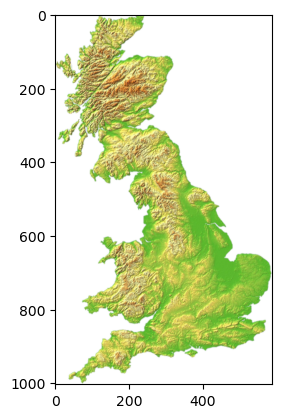

In [116]:
# load the base map from file
import matplotlib.pyplot as plt
import os

MY_PATH = r'C:\Users\bscho\Desktop'
os.chdir(MY_PATH)

img = plt.imread('GBmapsimple1.bmp')
imgplot = plt.imshow(img)
plt.show()

In [15]:
img[773][200:230]  # get a feel for the data

array([[177, 173,  88],
       [168, 164,  74],
       [195, 191, 106],
       [170, 165,  86],
       [165, 159,  77],
       [168, 161,  79],
       [140, 132,  51],
       [160, 151,  68],
       [155, 146,  62],
       [188, 178,  92],
       [225, 217, 130],
       [179, 170,  78],
       [181, 169,  74],
       [164, 152,  48],
       [201, 189,  82],
       [214, 203,  97],
       [174, 162,  64],
       [226, 216, 127],
       [248, 239, 158],
       [171, 160,  77],
       [181, 169,  81],
       [231, 212, 116],
       [212, 194,  88],
       [244, 235, 120],
       [252, 247, 133],
       [252, 247, 148],
       [251, 246, 166],
       [219, 213, 145],
       [188, 180, 117],
       [224, 207, 133]], dtype=uint8)

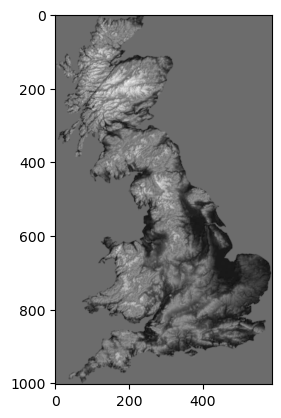

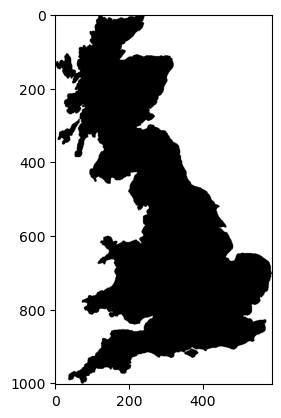

In [70]:
# transform to simple height from RGB
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return np.dot(rgb[...,:3], [0.5, -0.6, 0.0])  # brown is higher up, green is lower

def rgb2mask(rgb):
    '''create a mask for the land to prevent movement into the sea'''
    filter_arr = []
    # go through each element in arr
    for row in rgb:
        filter_row = []
        for element in row:
            if element[0] == 255 and element[1] == 255 and element[2] == 255:
                filter_row.append(1)
            else:
                filter_row.append(0)
        filter_arr.append(filter_row)
    return filter_arr

#img = mpimg.imread('image.png')     
gray = rgb2gray(img)
gray *= (1.0/(gray.max() - gray.min()))
gray -= gray.min()
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

mask = rgb2mask(img)
plt.imshow(mask, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [69]:
print(np.max(gray), np.min(gray))  # look at the data again
print('x, y:', len(gray[0]), len(gray))

0.9999999999999999 0.0
x, y: 587 1003


In [78]:
mask[800][400], mask[950][400]  # and again...

(0, 1)

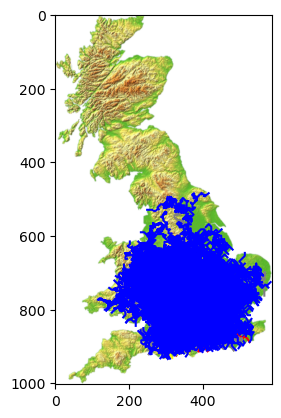

In [184]:
import random

def onestep(x, y, map, mask, factor=10):
    '''take one step on the map, considering the terrain'''
    nx, ny = x, y
    #if nx<0 or ny<0 or nx>len(map)-1 or ny>len(map[0])-1:
        #return -1, -1
    if mask[nx][ny] == 1:
        return -1, -1
    ctr = 0
    while mask[nx][ny] == 0 and ctr < 10:
        step = random.choice([(0,1), (1,1), (1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1)])
        nx = max(min(len(map)-1, x + int(step[0] * factor * (1-map[nx][ny]))), 0)  # very simple terrain factor: the higher, the harder
        ny = max(min(len(map[0])-1, y + int(step[1] * factor * (1-map[nx][ny]))), 0)
        ctr += 1
    return nx, ny

# onestep(800, 400, gray, mask)

def walkpath(xstart, ystart, map, mask, nsteps=100):
    '''walk an entire path on the terrain'''
    path = []
    x, y = xstart, ystart
    n = 0
    while n < nsteps and x > 0 and y > 0:
        x, y = onestep(x, y, gray, mask)
        if x>0 and y>0:
            path.append((x, y))
        n += 1
    return path

#cpath = walkpath(800, 400, gray, mask)
#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.imshow(img)

endpoints = []
# start with a few seed paths
for i in range(10):
    cpath = walkpath(900, 400, gray, mask)
    if len(cpath) > 0:
        endpoints.append(cpath[-1])
    plt.plot([x[1] for x in cpath], [x[0] for x in cpath], 'red')

# for each seed path, create generations of branches
colors = ['blue', 'red', 'yellow', 'grey']
for gencounts in range(5):
    ep2 = []
    for p in endpoints:
        for i in range(5):
            cpath = walkpath(p[0], p[1], gray, mask)
            if len(cpath) > 0:
                ep2.append(cpath[-1])
            plt.plot([x[1] for x in cpath], [x[0] for x in cpath], colors[gencounts % len(colors)])
    endpoints = [p for p in ep2]
    
plt.show()

In [3]:
# Accumulator factory

def accumulatorfactory(n):
    return lambda i: n + i

accumulatorfactory(5)(2)


7

In [8]:
# factors
import math

def factors(n):
    res = [1, n]
    for i in range(2, int(math.sqrt(n))+1):
        if n%i == 0:
            res.append(i)
            res.append(n // i)
    return res

factors(45)

[1, 45, 3, 15, 5, 9]

In [50]:

import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('btt-7-103.pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
number_of_pages = pdfreader.getNumPages()

#pageobj = pdfreader.getPage(0)
#fulltext = pageobj.extractText()

fulltext = ''
for page_number in range(number_of_pages):
    page = pdfreader.getPage(page_number)
    page_content = page.extractText()
    fulltext += page_content

#refpattern = r'Reference'
#print(re.match(refpattern, fulltext, re.IGNORECASE))
#refbegin = fulltext.find(refpattern)
#reftext = fulltext[refbegin:refbegin+1000]  # todo: how to find the end?

#refpattern = r' \d\.'
#print(re.findall(refpattern, reftext))
#print(re.split(refpattern, reftext))

matchtext = 'Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx'

abstracttext = "Hereditary angioedema (HAE) is an autosomal dominant, potentially life-threatening condition, manifesting as recurrent and self-limiting episodes of facial, laryngeal, genital, or peripheral swelling with abdominal pain secondary to intra-abdominal edema. The estimated prevalence of HAE in the general population is one individual per 50,000, with reported ranges from 1:10,000 to 1:150,000, without major sex or ethnic differences. Various treatment options for acute attacks and prophylaxis of HAE are authorized and available in the market, including plasma-derived (Berinert®, Cinryze®, and Cetor®) and recombinant (Rhucin® and Ruconest™) C1 inhibitors, kallikrein inhibitor-ecallantide (Kalbitor®), and bradykinin B2 receptor antagonist-icatibant (Firazyr®). Some of these drugs are used only to treat HAE attacks, whereas others are only approved for prophylactic therapies and all of them have improved disease outcomes due to their different mechanisms of action. Bradykinin and its binding to B2 receptor have been demonstrated to be responsible for most of the symptoms of HAE. Thus icatibant (Firazyr®), a bradykinin B2 receptor antagonist, has proven to be an effective and more targeted treatment option and has been approved for the treatment of acute attacks of HAE. Rapid and stable relief from symptoms of cutaneous, abdominal, or laryngeal HAE attacks has been demonstrated by 30 mg of icatibant in Phase III clinical trials. Self-resolving mild to moderate local site reactions after subcutaneous injection of icatibant were observed. Icatibant is a new, safe, and effective treatment for acute attacks of HAE. HAE has been reported to result in enormous humanistic burden to patients, affecting both physical and mental health, with a negative impact on education, career, and work productivity, and with substantial economic burdens. The timely and proper use of disease-specific treatments could improve patients' quality of life, reduce the disease-specific morbidity and mortality, and, last but not least, reduce costs associated with hospitalizations and emergency room visits. Therefore, the paradigm of HAE treatment has the potential to evolve significantly, thereby exponentially improving a patient's quality of life."


print(fulltext[5000:10000])




Xref table not zero-indexed. ID numbers for objects will be corrected.


iagnosis  
of HAE
History
J L Milton was the first to describe HAE, in 1876,4 and 
Quincke was the first to assign the name “angioneurotic 
edema” to the disease, in 1882.5 Mental stress was observed 
to have an effect on exacerbations of the disease, thus the word 
“neurotic” was used as part of its name. Sir William Osler, in 
1888, was the first to provide a detailed description of HAE 
over five generations, thus noting the hereditary component of 
this disease.6 The biochemical basis for hereditary angioneu -
rotic edema – the absence of C1-INH – was discovered several 
decades later and first published by Donaldson and Evans in 
1963.7 Since that study, a plethora of information regarding 
the genetic basis, pathophysiology, clinical manifestation, and 
management of HAE has been discovered and published.
Epidemiology
The estimated prevalence of HAE is 1 in 50,000, with 
reported ranges from 1:10,000 to 1:150,000.1,8,9,19 HAE has 
been reported in all races and sexes. Type 1 is e

In [21]:
fulltext = fulltext.replace("\n", "")
fulltext_data = [sentence.split(" ") for sentence in fulltext.split('.')]
print(fulltext_data[:10])

[['©', '2013', 'Ghazi', 'and', 'Grant,', 'publisher', 'and', 'licensee', 'Dove', 'Medical', 'Press', 'Ltd'], ['', 'This', 'is', 'an', 'Open', 'Access', 'article', '', 'which', 'permits', 'unrestricted', 'noncommercial', 'use,', 'provided', 'the', 'original', 'work', 'is', 'properly', 'cited'], ['Biologics:', 'Targets', 'and', 'Therapy', '2013:7', '103–113Biologics:', 'Targets', 'and', 'TherapyHereditary', 'angioedema:', 'epidemiology,', '', 'management,', 'and', 'role', 'of', 'icatibantAasia', 'GhaziJ', 'Andrew', 'GrantUniversity', 'of', 'Texas', 'Medical', 'Branch,', 'Division', 'of', 'Allergy', 'and', 'Clinical', 'Immunology,', 'Galveston,', 'TX,', 'USACorrespondence:', 'Aasia', 'Ghazi', '', 'University', 'of', 'Texas', 'Medical', 'Branch,', 'Division', 'of', 'Allergy', 'and', 'Clinical', 'Immunology,', '5'], ['112', 'John', 'Sealy', 'Annex,', '', '301', 'University', 'Blvd,', 'Galveston,', '', 'TX', '77555-0561,', 'USA', '', 'Fax', '+1', '409', '772', '9532', '', 'Email', 'aighazi@u

In [2]:
# https://radimrehurek.com/gensim/models/doc2vec.html
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html

#from gensim.test.utils import common_texts
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
#model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

#vector = model.infer_vector(["system", "response"])



import gensim
import gensim.downloader as api

dataset = api.load("text8")
data = [d for d in dataset]


def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])


data_for_training = list(tagged_document(data))

model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))




[-0.07382889 -0.10497645 -0.28748462  0.09153821  0.02906915 -0.1983337
 -0.08478821  0.05747487 -0.15897487 -0.01400731  0.2294637  -0.06198872
 -0.26587364 -0.10655783 -0.21334662 -0.03214156 -0.0551004   0.11489787
 -0.350107   -0.12751701  0.12931593  0.12799586 -0.0140921   0.03661414
 -0.02935428 -0.12121519 -0.1826431  -0.20766081 -0.03520737 -0.15218696
 -0.03321822  0.05526032 -0.3057363  -0.41226405 -0.24270225  0.05079066
 -0.14740245 -0.42780653 -0.06188729 -0.10430484]


In [5]:
print(data[:2])

[['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 's

In [7]:
print(list(dataset)[:2])

[['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 's

In [10]:
import random

doc_id = random.randint(0, len(data_for_training) - 1)

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(data_for_training[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)

for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(data_for_training[sims[index][0]].words)))

Document (739): «subdivisions they are to be considered counties rather than states estonian pl maakonnad sg maakond international organization participation estonia is member of the bis cbss ce eapc ebrd ece eu fao iaea ibrd icao icc icftu icrm ifc ifrcs iho ilo imf imo interpol ioc iom observer iso correspondent itu opcw osce un unctad unesco unmibh unmik untso upu wco weu associate partner who wipo wmo wto source estonica estonia in brief political system politics of estonia estonia as a new member of the wto is steadily moving toward a modern market economy with increasing ties to the west including the pegging of its currency to the euro it acceded to the european union in two zero zero four there is a great degree of economic mobility and technological advancement the state of the economy is greatly influenced by developments in finland sweden and germany three major trading partners the high current account deficit remains a concern although the economy has high gdp growth aroun

NameError: name 'sims' is not defined

## test ref check

In [1]:
import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('btt-7-103.pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
number_of_pages = pdfreader.getNumPages()

fulltext = ''
for page_number in range(number_of_pages):
    page = pdfreader.getPage(page_number)
    page_content = page.extractText()
    fulltext += page_content

matchtext = 'Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx'

abstracttext = "Hereditary angioedema (HAE) is an autosomal dominant, potentially life-threatening condition, manifesting as recurrent and self-limiting episodes of facial, laryngeal, genital, or peripheral swelling with abdominal pain secondary to intra-abdominal edema. The estimated prevalence of HAE in the general population is one individual per 50,000, with reported ranges from 1:10,000 to 1:150,000, without major sex or ethnic differences. Various treatment options for acute attacks and prophylaxis of HAE are authorized and available in the market, including plasma-derived (Berinert®, Cinryze®, and Cetor®) and recombinant (Rhucin® and Ruconest™) C1 inhibitors, kallikrein inhibitor-ecallantide (Kalbitor®), and bradykinin B2 receptor antagonist-icatibant (Firazyr®). Some of these drugs are used only to treat HAE attacks, whereas others are only approved for prophylactic therapies and all of them have improved disease outcomes due to their different mechanisms of action. Bradykinin and its binding to B2 receptor have been demonstrated to be responsible for most of the symptoms of HAE. Thus icatibant (Firazyr®), a bradykinin B2 receptor antagonist, has proven to be an effective and more targeted treatment option and has been approved for the treatment of acute attacks of HAE. Rapid and stable relief from symptoms of cutaneous, abdominal, or laryngeal HAE attacks has been demonstrated by 30 mg of icatibant in Phase III clinical trials. Self-resolving mild to moderate local site reactions after subcutaneous injection of icatibant were observed. Icatibant is a new, safe, and effective treatment for acute attacks of HAE. HAE has been reported to result in enormous humanistic burden to patients, affecting both physical and mental health, with a negative impact on education, career, and work productivity, and with substantial economic burdens. The timely and proper use of disease-specific treatments could improve patients' quality of life, reduce the disease-specific morbidity and mortality, and, last but not least, reduce costs associated with hospitalizations and emergency room visits. Therefore, the paradigm of HAE treatment has the potential to evolve significantly, thereby exponentially improving a patient's quality of life."


Xref table not zero-indexed. ID numbers for objects will be corrected.


In [8]:

import gensim
import gensim.downloader as api


fulltext = fulltext.replace("\n", "")
#fulltext_data = [sentence.split(" ") for sentence in fulltext.split('.')]  # split sentences
fulltext = fulltext.replace(".", "")
splitlength = len(matchtext.split(" "))
fulltext_list = fulltext.split(" ")
fulltext_data = [fulltext_list[i:i+splitlength] for i in range(0, len(fulltext_list)-splitlength, splitlength)]

print(fulltext_data[:5])


def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])


data_for_training = list(tagged_document(fulltext_data))

model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))


[['©', '2013', 'Ghazi', 'and', 'Grant,', 'publisher', 'and', 'licensee', 'Dove', 'Medical', 'Press', 'Ltd', 'This', 'is', 'an', 'Open', 'Access', 'article', '', 'which', 'permits', 'unrestricted', 'noncommercial', 'use,', 'provided', 'the', 'original', 'work', 'is', 'properly'], ['citedBiologics:', 'Targets', 'and', 'Therapy', '2013:7', '103–113Biologics:', 'Targets', 'and', 'TherapyHereditary', 'angioedema:', 'epidemiology,', '', 'management,', 'and', 'role', 'of', 'icatibantAasia', 'GhaziJ', 'Andrew', 'GrantUniversity', 'of', 'Texas', 'Medical', 'Branch,', 'Division', 'of', 'Allergy', 'and', 'Clinical', 'Immunology,'], ['Galveston,', 'TX,', 'USACorrespondence:', 'Aasia', 'Ghazi', '', 'University', 'of', 'Texas', 'Medical', 'Branch,', 'Division', 'of', 'Allergy', 'and', 'Clinical', 'Immunology,', '5112', 'John', 'Sealy', 'Annex,', '', '301', 'University', 'Blvd,', 'Galveston,', '', 'TX', '77555-0561,', 'USA'], ['', 'Fax', '+1', '409', '772', '9532', '', 'Email', 'aighazi@utmbed', 'uAb

In [9]:
ranks = []
second_ranks = []
for doc_id in range(len(data_for_training)):
    inferred_vector = model.infer_vector(data_for_training[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [10]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 27, 7: 16, 1: 14, 2: 13, 3: 12, 11: 9, 5: 9, 9: 8, 10: 8, 4: 7, 8: 7, 21: 7, 6: 7, 13: 6, 14: 5, 18: 5, 15: 5, 12: 5, 27: 5, 24: 5, 40: 4, 35: 4, 30: 4, 26: 4, 22: 4, 28: 4, 31: 4, 17: 3, 38: 3, 34: 3, 16: 3, 51: 3, 47: 3, 19: 3, 25: 3, 56: 3, 39: 2, 45: 2, 29: 2, 36: 2, 274: 2, 52: 2, 61: 2, 125: 2, 20: 2, 37: 2, 33: 2, 32: 2, 41: 1, 62: 1, 80: 1, 60: 1, 135: 1, 91: 1, 67: 1, 148: 1, 78: 1, 95: 1, 269: 1, 68: 1, 75: 1, 112: 1, 50: 1, 64: 1, 88: 1, 74: 1, 90: 1, 43: 1})


In [11]:
import random

doc_id = random.randint(0, len(data_for_training) - 1)

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(data_for_training[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)

for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(data_for_training[sims[index][0]].words)))

Document (219): «in this workReferences 1 Nzeako UC, Frigas E, Tremaine WJ Hereditary angioedema: a broad review for clinicians Arch Intern Med  2001;161(20):2417–2429 2 Bork K, Barnstedt SE, Koch P ,»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec<dm/m,d40,n5,w5,mc2,s0.001,t3>:

MOST (278, 0.9957640767097473): «Receptor Antagonism on ACE Inhibitor-associated Angioedema In Clinical Trials gov [website on the Internet] Bethesda, MD: US National Library of Medicine; Last verified: Dec 2012 Available from: http://clinicaltrialsgov/ct2/show/NCT0157424 8 NLM»

SECOND-MOST (15, 0.9956229329109192): «area involving the skin, mucosa, and subcutaneous tissues The most commonly involved areas include the face, lips, tongue, pharynx, and supraglottic area and, uncommonly, the subglottic area1 Angioedema may also»

MEDIAN (104, 0.9877470135688782): «preparations36 The drug further established its  selectivity to bradykinin 2 receptors by demonstrating inactivity in isolated rabbit aorta, which contain

In [12]:

matchtext = 'Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx'

#vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
vector = model.infer_vector(matchtext.split(' '))

print(vector)

[ 0.09534533 -0.02504518 -0.08367289  0.01826239  0.03841166  0.02748144
  0.02676394  0.05754841 -0.09805177  0.16429867  0.21470748 -0.08415074
  0.13337348 -0.08881006  0.2274338   0.24717343 -0.01166112 -0.05567672
 -0.11951394 -0.12060754  0.13014255 -0.04830761  0.28551432  0.15907647
 -0.15336798  0.01979847 -0.11195233  0.27896896 -0.28449383 -0.03764651
  0.0315863  -0.03049299  0.23261991  0.03307763  0.07152639  0.08022597
  0.57099915 -0.24890585 -0.299198   -0.1887    ]


In [13]:

print(matchtext)
print()

# Pick a random document from the test corpus and infer a vector from the model
#doc_id = random.randint(0, len(data_for_training) - 1)
#inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.dv.most_similar([vector], topn=len(model.dv))

# Compare and print the most/median/least similar documents from the train corpus
#print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(data_for_training[doc_id])))
#print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
#for label, index in [('MOST', 0), ('2ndMOST', 1), ('3rdMOST', 2), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
#    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(data_for_training[sims[index][0]].words)))

for index in range(len(sims)//20):
    print(f"{sims[index]} : {' '.join(data_for_training[sims[index][0]].words)}")

Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx

(272, 0.9954084157943726) : Expert Rev Clin Immunol  2011;7(3):267–272 60 Bright P, Dempster J, Longhurst H Successful treatment of acquired C1 inhibitor deficiency with icatibant Clin Exp Dermatol  2010;35(5):553–554 61 Bouillet L
(271, 0.9951936602592468) : practice Hereditary angioedema N Engl J Med  2008;359(10):1027–1036 58 Longhurst H, Cicardi M Hereditary angioedema Lancet  2012; 379(9814):474–481 59 Bouillet L Icatibant in hereditary angioedema: news and challenges
(243, 0.9944719076156616) : 2010;6(1):22 31 Cugno M, Zanichelli A, Foieni F , Caccia S, Cicardi M C1-inhibitor defi -ciency and angioedema: molecular mechanisms and clinical  progress Trends Mol Med  2009;15:69–78 32
(232, 0.9944119453430176) : 1998;103(251):  255–256

In [14]:

# which documents best match the current vector? ranks holds the match, with reference to train_corpus 
# here we simply count the word frequencies
for docidx, currentdoc in enumerate(train_corpus):
    ranks.append((docidx, currentdoc.tags, sum([currentdoc.words.count(w) for w in infvec])))
            

NameError: name 'train_corpus' is not defined

In [17]:

from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora


MY_PATH = r'D:\DL\lrgtxt0'
WAIT_1 = 1

corpus_matchtext = preprocess_string(matchtext)

print(corpus_matchtext)


['hereditari', 'angioedema', 'hae', 'inhibitor', 'defici', 'inh', 'hae', 'rare', 'inherit', 'diseas', 'character', 'unpredict', 'potenti', 'life', 'threaten', 'recurr', 'swell', 'attack', 'commonli', 'affect', 'extrem', 'face', 'abdomen', 'larynx']


In [34]:
corpus_fulltext = preprocess_string(fulltext)
fulltext_data = [corpus_fulltext[i*splitlength:(i+1)*splitlength] for i in range(0, len(corpus_fulltext)//(splitlength))]



In [35]:
data_for_training = list(tagged_document(fulltext_data))

model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))

[-0.00634116 -0.00732283 -0.00934601 -0.00428867  0.00237725 -0.00863081
 -0.00063491  0.00936219 -0.00600026  0.00722371  0.01088892 -0.00449116
 -0.00086033  0.00425785  0.00095157 -0.00876158 -0.00275599 -0.01024196
  0.01198313 -0.01144261  0.0089591   0.00798538  0.00214145  0.00169069
 -0.00126573 -0.01127429 -0.00216438  0.01244055  0.00859177  0.00936317
  0.01042689 -0.00182631  0.00132348 -0.00749632 -0.00904067  0.01042178
 -0.00275498 -0.00879623  0.00852951 -0.00047395]


In [36]:
vector = model.infer_vector(corpus_fulltext)

print(vector)

[ 0.19370985  0.06585722 -0.4298534  -0.22273217  0.18966018  0.07252558
 -0.04851793  0.19893993 -0.4187134   0.16689813  0.4279656  -0.07441171
  0.27893794  0.05517597  0.55783105  0.6126067   0.18850456  0.03656549
 -0.23839274 -0.05433416 -0.01975466  0.2765813   0.17019373  0.1021357
 -0.2654848  -0.1983967   0.04726624  0.6826961  -0.57956934 -0.03136047
  0.19373034  0.32173797 -0.02981607 -0.07967106  0.28473842  0.23813596
  0.544707   -0.47874168 -0.6482921  -0.5219032 ]


In [38]:
print(matchtext)
print()
print(corpus_matchtext)
print()

sims = model.dv.most_similar([vector], topn=len(model.dv))

for index in range(len(sims)//20):
    print(f"{sims[index]} : {' '.join(data_for_training[sims[index][0]].words)}")

Hereditary angioedema (HAE) with C1 inhibitor deficiency (C1-INH-HAE) is a rare inherited disease characterized by unpredictable, potentially life-threatening recurrent swelling attacks most commonly affecting the extremities, face, abdomen, and larynx

['hereditari', 'angioedema', 'hae', 'inhibitor', 'defici', 'inh', 'hae', 'rare', 'inherit', 'diseas', 'character', 'unpredict', 'potenti', 'life', 'threaten', 'recurr', 'swell', 'attack', 'commonli', 'affect', 'extrem', 'face', 'abdomen', 'larynx']

(76, 0.9219459295272827) : report valid clinic efficaci icatib cutan abdomin attack haethre phase iii control doubl blind random multicent studi angioedema subcutan treat ment fast trial investig clinic efficaci safeti icatib treatment acut
(99, 0.9175319671630859) : patient evalu safeti efficaci self administ icatib acut attack need health care profession administ second dose overal studi demonstr self administr icatib acut attack hae gener toler safe time symptom
(17, 0.9161267280578613) :